#📌 Extracción

In [81]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns

In [82]:
# URL del archivo JSON en GitHub (versión cruda del archivo)
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Hacer la solicitud HTTP al archivo con el fin de no cargarlo al notebook directamente
response = requests.get(url)
response.raise_for_status()  # Verifica errores en la solicitud

# Convertir los datos JSON en un DataFrame
data = response.json()
df = pd.DataFrame(data)

# Mostrar las primeras filas del DataFrame
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [83]:
# Información básica del DataFrame
df.info()
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object


In [84]:
#Visualizar cada col del DataFrame
cols= df.columns
for i in cols:
  print(df.loc[1,i])

0003-MKNFE
No
{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 9}
{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}
{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'No', 'StreamingMovies': 'Yes'}
{'Contract': 'Month-to-month', 'PaperlessBilling': 'No', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 59.9, 'Total': '542.4'}}


In [85]:
# Aplanar el JSON
df_flat = pd.json_normalize(df.to_dict(orient='records'))
df_flat

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [86]:
# Verificar si hay duplicados
duplicados = df_flat.duplicated().sum()
print(f"Duplicados encontrados: {duplicados}")

# Verificar valores nulos
print("\nValores nulos por columna:")
print(df_flat.isnull().sum())

# Revisar tipos de datos
print("\nTipos de datos:")
print(df_flat.dtypes)

# Convertir columnas numéricas
# Convertir account.Charges.Total que está en string a float, manejar valores como ' ' (vacío)
df_flat['account.Charges.Total'] = pd.to_numeric(df_flat['account.Charges.Total'], errors='coerce')

# Verificar si hay NaN después de la conversión
print("\nValores nulos en account.Charges.Total después de conversión:")
print(df_flat['account.Charges.Total'].isnull().sum())

Duplicados encontrados: 0

Valores nulos por columna:
customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64

Tipos de datos:
customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.

In [87]:
mean_total = df_flat['account.Charges.Total'].mean()
df_flat['account.Charges.Total'] = df_flat['account.Charges.Total'].fillna(mean_total)

print("\nValores nulos en account.Charges.Total después de conversión:")
print(df_flat['account.Charges.Total'].isnull().sum())


Valores nulos en account.Charges.Total después de conversión:
0


In [88]:
# Convertir columnas numéricas
# Convertir account.Charges.Total que está en string a float, manejar valores como ' ' (vacío)
df_flat['account.Charges.Monthly'] = pd.to_numeric(df_flat['account.Charges.Monthly'], errors='coerce')

# Verificar si hay NaN después de la conversión
print("\nValores nulos en account.Charges.Monthly después de conversión:")
print(df_flat['account.Charges.Monthly'].isnull().sum())


Valores nulos en account.Charges.Monthly después de conversión:
0


In [89]:
df_flat['Cuentas_Diarias'] = df_flat['account.Charges.Monthly'] / 30

In [90]:
df_flat[['account.Charges.Monthly', 'Cuentas_Diarias']].head()

,account.Charges.Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


#📊 Carga y análisis

In [91]:
# Resumen estadístico
df_flat.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098,2280.634213,2.157337
std,0.369074,24.571773,30.129572,2266.915104,1.004319
min,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.425000,401.400000,1.180833
50%,0.000000,29.000000,70.300000,1394.550000,2.343333
75%,0.000000,55.000000,89.875000,3778.525000,2.995833
max,1.000000,72.000000,118.750000,8684.800000,3.958333


In [92]:
# Estilo visual
sns.set(style="whitegrid")

# Conteo simple
churn_counts = df_flat['Churn'].value_counts()
print(churn_counts)

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


In [93]:
df_flat = df_flat[df_flat['Churn'].notnull()]
df_flat

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


In [94]:
print(df_flat['Churn'].unique())

['No' 'Yes' '']


In [95]:
# Limpiar espacios en blanco y capitalizar valores
df_flat['Churn'] = df_flat['Churn'].astype(str).str.strip().str.capitalize()

# Reemplazar strings vacíos y 'nan' como texto por np.nan
df_flat['Churn'] = df_flat['Churn'].replace(['', 'Nan', 'nan'], np.nan)

# Eliminar filas donde Churn es NaN
df_flat = df_flat[df_flat['Churn'].notna()]

In [96]:
print(df_flat['Churn'].unique())


['No' 'Yes']


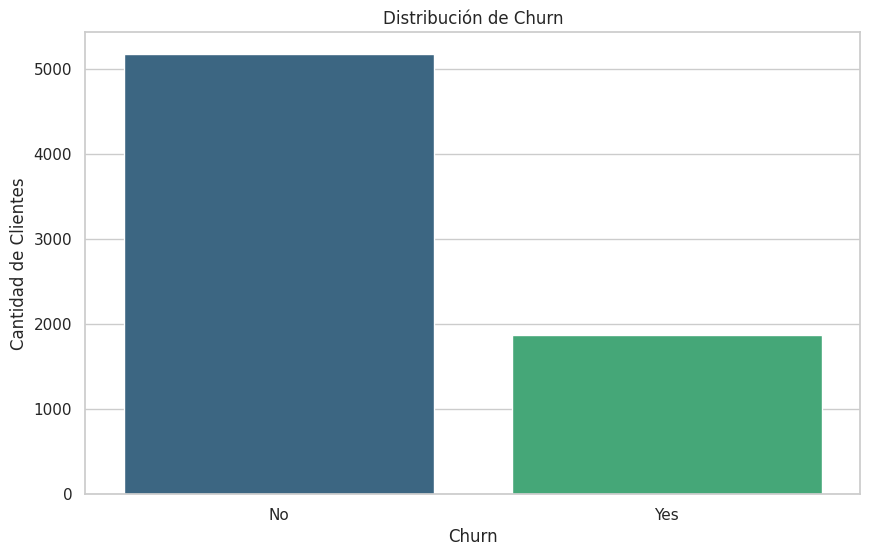

In [97]:
#Correccion que debe haber para no mostrar el valor ''
sns.countplot(data=df_flat, x='Churn', hue='Churn', palette='viridis', legend=False)
plt.title('Distribución de Churn')
plt.xlabel('Churn')
plt.ylabel('Cantidad de Clientes')
plt.show()

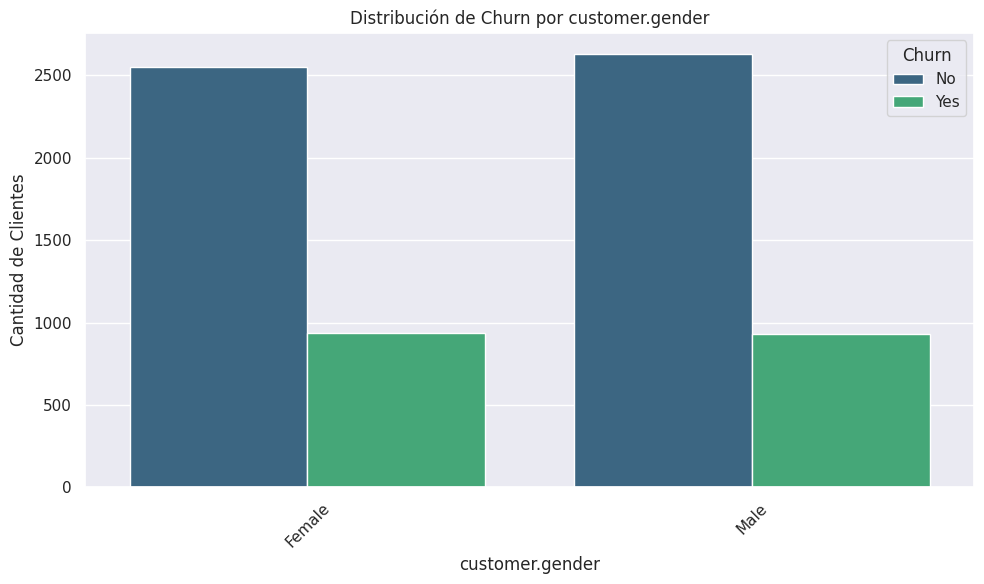

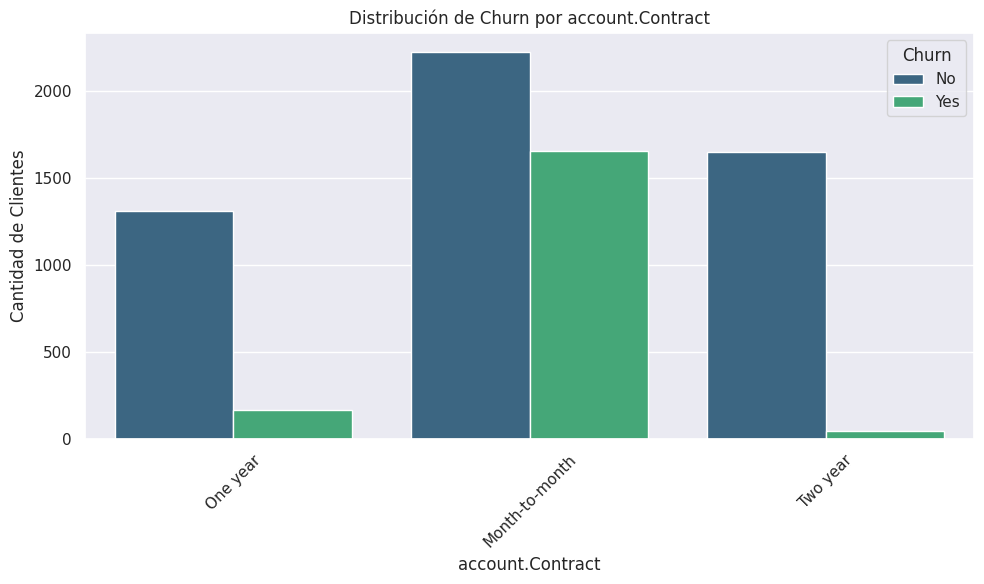

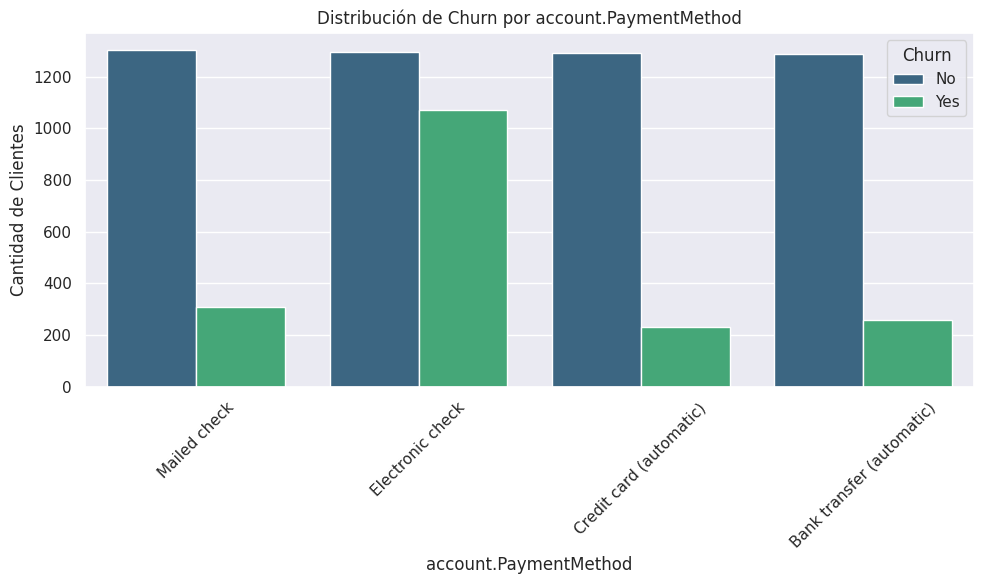

In [98]:
sns.set(rc={'figure.figsize':(10, 6)})

# Lista de variables categóricas
categorical_vars = ['customer.gender', 'account.Contract', 'account.PaymentMethod']

# Crear un gráfico por cada variable categórica
for var in categorical_vars:
    sns.countplot(data=df_flat, x=var, hue='Churn', palette='viridis')
    plt.title(f'Distribución de Churn por {var}')
    plt.xlabel(var)
    plt.ylabel('Cantidad de Clientes')
    plt.xticks(rotation=45)
    plt.legend(title='Churn')
    plt.tight_layout()
    plt.show()

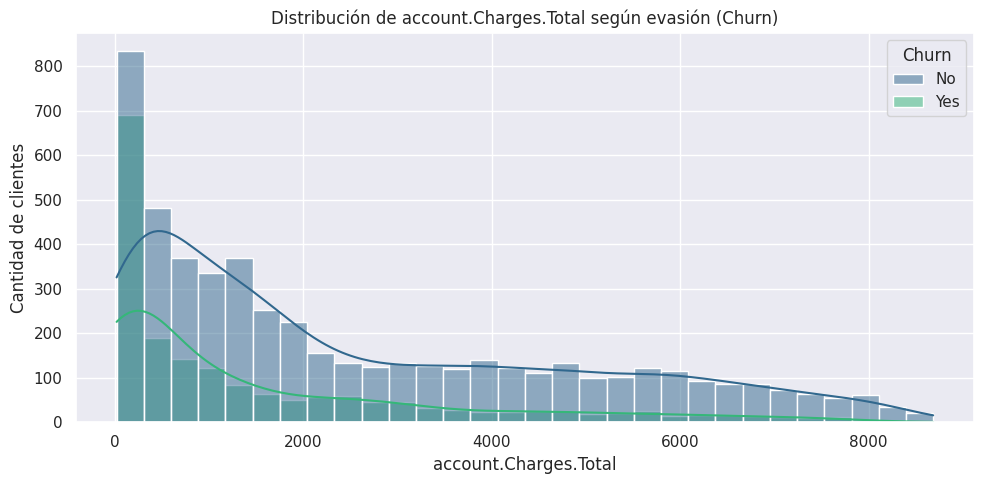

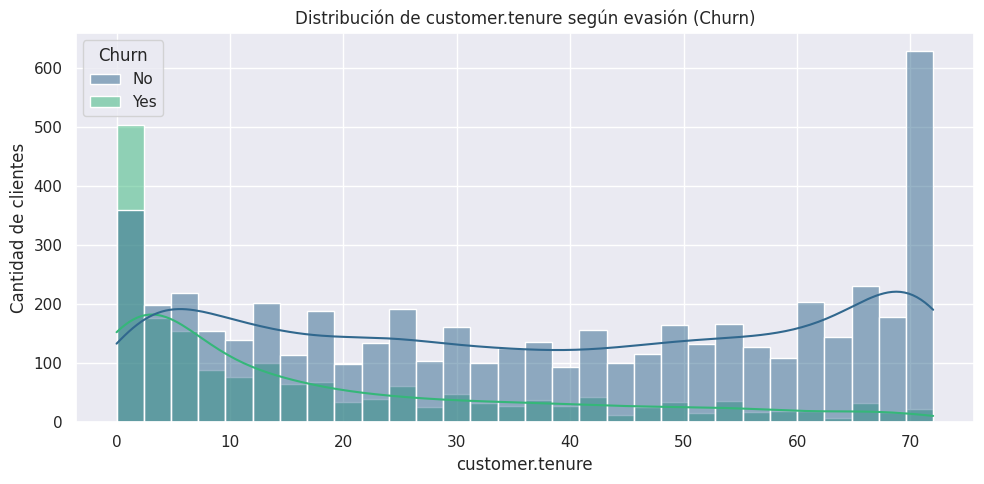

In [99]:
# Lista de variables numéricas
numeric_vars = ['account.Charges.Total', 'customer.tenure']

# Histogramas
for var in numeric_vars:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df_flat, x=var, hue='Churn', kde=True, palette='viridis', bins=30)
    plt.title(f'Distribución de {var} según evasión (Churn)')
    plt.xlabel(var)
    plt.ylabel('Cantidad de clientes')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


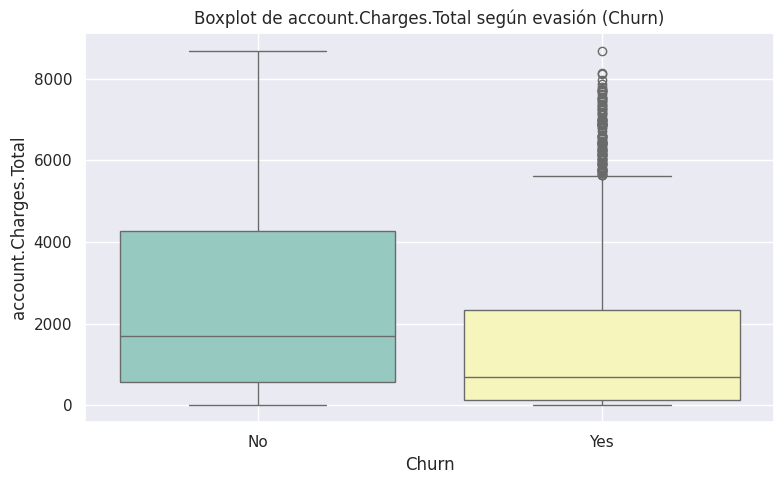

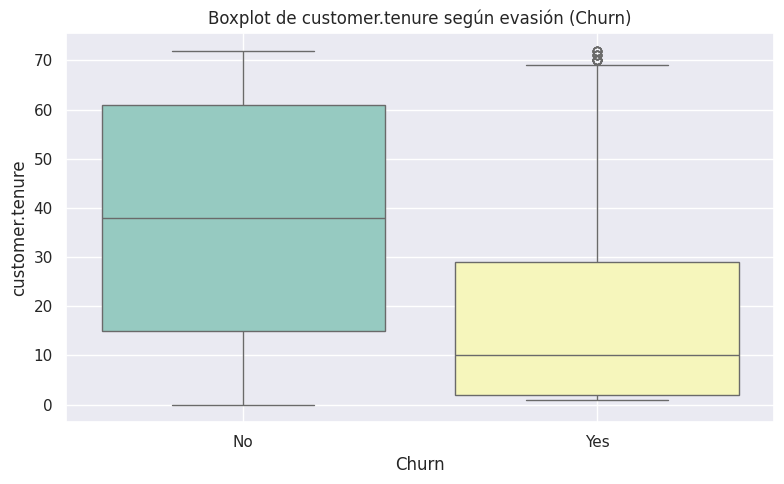

In [105]:
for var in numeric_vars:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_flat, x='Churn', y=var, hue='Churn', palette='Set3', legend=False)

    #sns.boxplot(data=df_flat, x='Churn', y=var, palette='Set3')
    plt.title(f'Boxplot de {var} según evasión (Churn)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#📄Informe final

1. Calidad de los datos:
   - Se eliminaron duplicados y se estandarizaron valores inconsistentes.
   - Las columnas numéricas fueron convertidas correctamente y los valores faltantes se imputaron con la media.
   - La variable “Churn” se limpió, eliminando valores vacíos y normalizando mayúsculas/minúsculas.

2. Distribución de Churn:
   - Existe un desbalance moderado en la proporción de clientes que abandonan el servicio vs. los que permanecen.
   - Este factor debe considerarse en futuros modelos predictivos.

3. Variables categóricas:
   - El género no muestra una diferencia marcada en la evasión.
   - El tipo de contrato es clave: los clientes con contratos mensuales presentan mayor tasa de churn que los de contratos a largo plazo.
   - El método de pago también influye: clientes con pago electrónico automático tienen menor propensión a cancelar.

4. Variables numéricas:
   - Los clientes con menor tiempo de permanencia (tenure bajo) son más propensos a cancelar.
   - El cargo total (Total Charges) es generalmente menor en clientes que han hecho churn, lo que confirma la relación con baja antigüedad.
   - El cargo mensual (Monthly Charges) no tiene un patrón tan claro, pero en combinación con tenure puede dar señales relevantes.

5. Recomendaciones:
   - Implementar estrategias de retención enfocadas en clientes con contratos mensuales y baja permanencia.
   - Incentivar el uso de pagos automáticos como método principal.
   - Utilizar estas variables como insumos para un modelo de predicción de churn más robusto.
"""